In [19]:
import os
import pickle
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
from itertools import cycle
import torch 

import EWOthello.utils.plot_helpers as plt_utils
from EWOthello.mingpt.probe_model import BatteryProbeClassification
from EWOthello.data.othello import *
from EWOthello.mingpt.dataset import CharDataset 
from EWOthello.mingpt.model import GPT, GPTConfig, GPTforProbing, GPTforProbing_v2

In [73]:
datapath = "../EWOthello/ckpts/"
all_files = os.listdir(datapath)
GPT_Folders = [name for name in all_files if name.startswith("Dean_GPTv2_Synthetic")]
GPT_Folders.sort()
print(GPT_Folders)

['Dean_GPTv2_Synthetic_1L1H', 'Dean_GPTv2_Synthetic_1L8H', 'Dean_GPTv2_Synthetic_2L1H', 'Dean_GPTv2_Synthetic_2L8H', 'Dean_GPTv2_Synthetic_4L1H', 'Dean_GPTv2_Synthetic_4L8H', 'Dean_GPTv2_Synthetic_8L1H', 'Dean_GPTv2_Synthetic_8L8H']


../EWOthello/ckpts/Dean_GPTv2_Synthetic_1L1H/
../EWOthello/ckpts/Dean_GPTv2_Synthetic_1L8H/
../EWOthello/ckpts/Dean_GPTv2_Synthetic_2L1H/
../EWOthello/ckpts/Dean_GPTv2_Synthetic_2L8H/
../EWOthello/ckpts/Dean_GPTv2_Synthetic_4L1H/
../EWOthello/ckpts/Dean_GPTv2_Synthetic_4L8H/
../EWOthello/ckpts/Dean_GPTv2_Synthetic_8L1H/
../EWOthello/ckpts/Dean_GPTv2_Synthetic_8L8H/


Text(0.5, 1.0, 'GPT Training Legal Move Accuracy (synthetic games)')

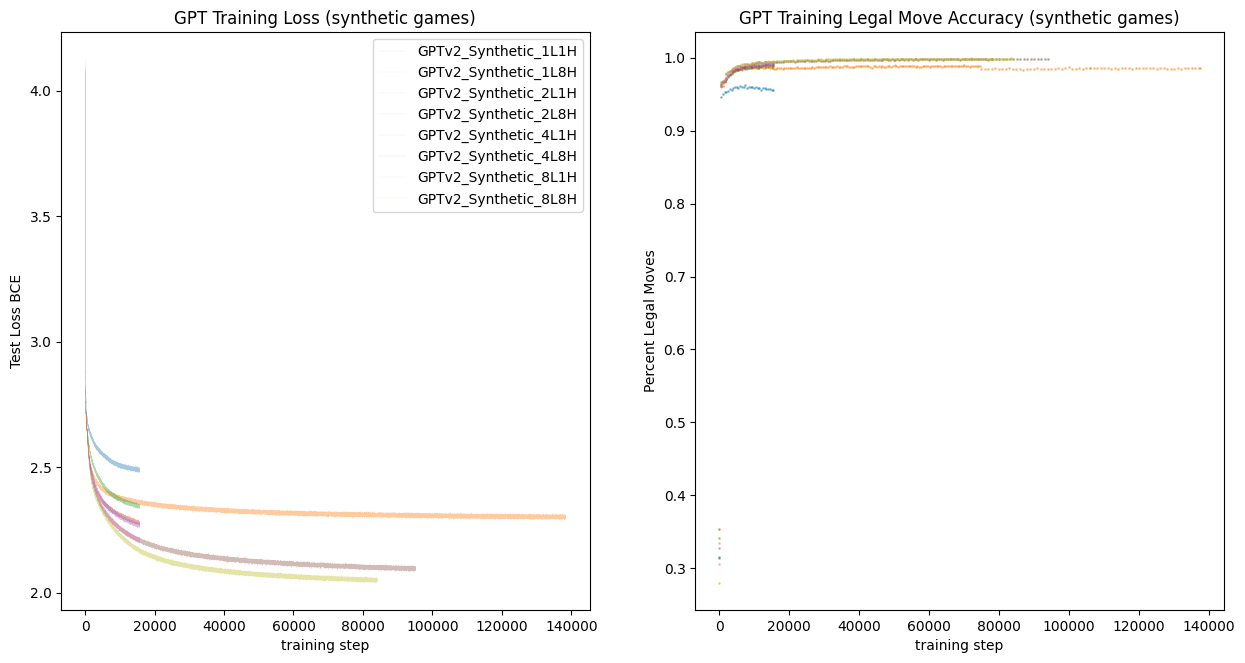

In [74]:
fig = plt.figure(figsize=(15,7.5))
ax = plt_utils.addAxis(fig,1,2)
colors = cycle(['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:olive', 'tab:cyan'])

for fold in GPT_Folders:
    model_path = datapath + fold + "/"
    print(model_path)
    training_history_path = [name for name in os.listdir(model_path) if name.endswith("Heads.pickle")][0]
    use_color = next(colors)

    with open(model_path + training_history_path, 'rb') as fhandle:
        training_history = pickle.load(fhandle)
        training_loss = training_history["training_loss"]
        testing_loss = training_history["testing_loss"]
        val_legal_perc = training_history["val_legal_perc"]

        ax[0].plot(testing_loss, '-', color=use_color, alpha=0.4, linewidth=0.1, label=fold[5:])
        ax[1].plot(val_legal_perc, 'o', color=use_color, markersize=1, alpha=0.4)

ax[0].legend()
ax[0].set_xlabel("training step")
ax[1].set_xlabel("training step")
ax[0].set_ylabel("Test Loss BCE")
ax[1].set_ylabel("Percent Legal Moves")
ax[0].set_title("GPT Training Loss (synthetic games)")
ax[1].set_title("GPT Training Legal Move Accuracy (synthetic games)")